<a href="https://colab.research.google.com/github/8johan/devoir/blob/main/rmf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Database contains 3397 patients for the consideration of Testosterone Deficiency. The Research Ethics Committee of the State University of Feira de Santana, Bahia, Brazil, approved the study with the ethical approval code: 3,057,301.

All six features were obtained by low-cost exams/informations, which enable other researchers to add new data and try different algorithms.

Features:

Age: in years (we only considered patients aged from 45-85 years);
Triglycerides (TG): Integer Numbers (mg/dl);
Waist Circumference (WC): in centimeters (medical literature usually thresholds at 102cm);
HDL: Integer numbers (mg/dl);
Hypertension: Binary, in which 1 is presence, and 0 is absence;
Diabetes: Binary, in which 1 is presence, and 0 is absence.
Target:

T: Testosterone (Medical Literature suggests a deficiency when T<300 ng/dl).
link to data https://github.com/osmarluiz/Testosterone-Deficiency-Dataset/blob/main/ptestost.xlsx?raw=true


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt

In [4]:
#import the data 
x=pd.read_excel('ptestost.xlsx', index_col=0)  

In [56]:
x.head
xp=x.to_csv
x.shape
x.head(10)

,DM,TG,HT,HDL,AC,T
Age,,,,,,
60,0,145,1,35.0,114.0,0
75,0,93,0,48.0,84.0,0
50,0,151,0,57.0,99.0,0
62,0,178,1,28.0,109.0,0
55,0,138,1,62.0,98.0,0
79,0,146,1,42.0,100.0,0
63,1,245,1,35.0,97.0,0
53,0,163,0,55.0,94.0,0
69,0,67,0,60.0,107.0,0


In [17]:
x.describe()

,DM,TG,HT,HDL,AC,T
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,0.388578,155.269650,0.511922,46.325493,98.916515,0.193112
std,0.487499,88.840249,0.499931,10.960146,10.629471,0.394798
min,0.000000,12.000000,0.000000,13.000000,43.000000,0.000000
25%,0.000000,97.000000,0.000000,39.000000,92.000000,0.000000
50%,0.000000,136.000000,1.000000,45.000000,98.000000,0.000000
75%,1.000000,183.000000,1.000000,52.000000,105.000000,0.000000
max,1.000000,980.000000,1.000000,116.000000,198.000000,1.000000


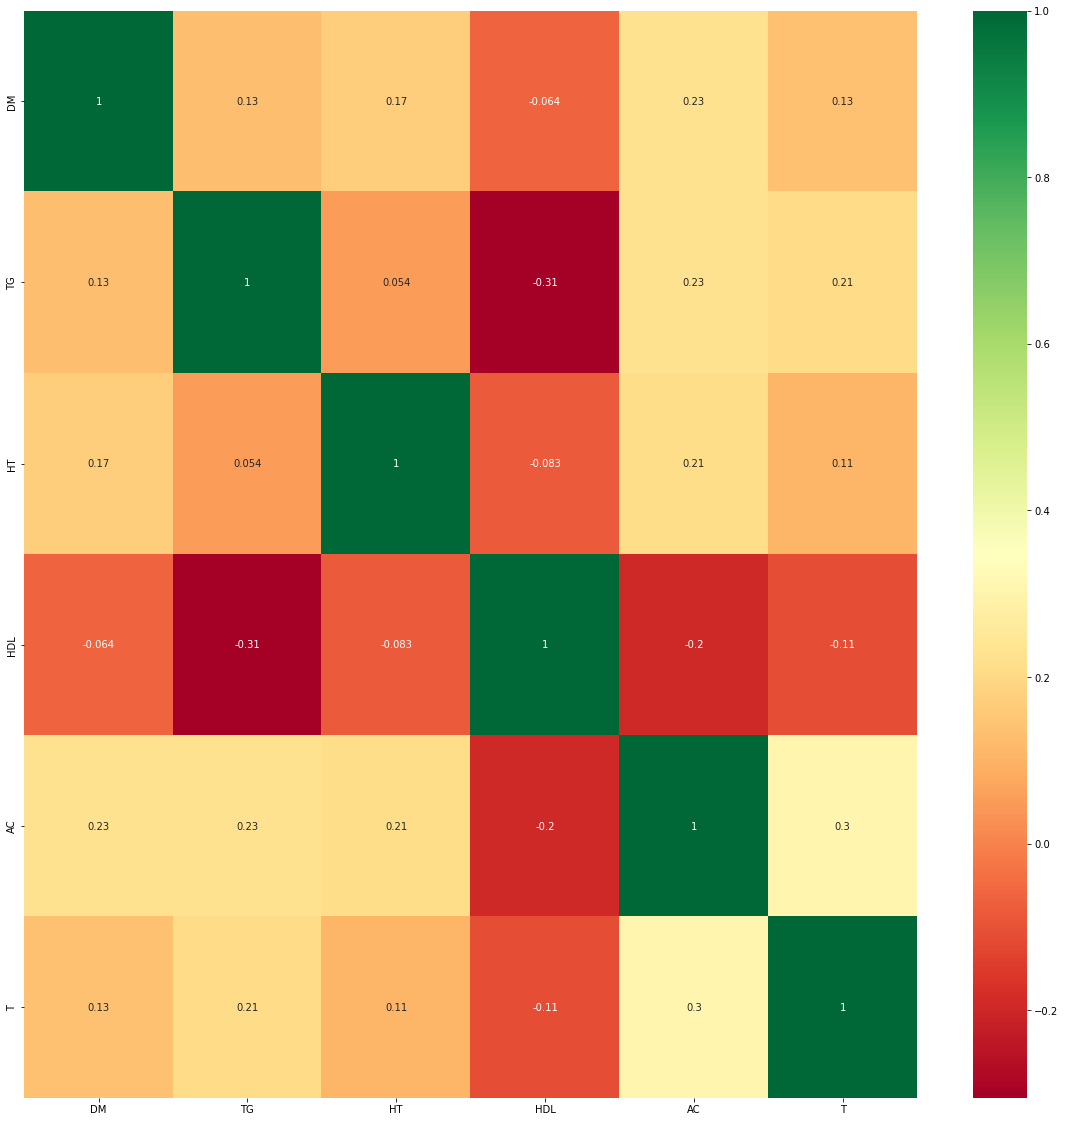

In [15]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset

corrmat =x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
x.corr()

,DM,TG,HT,HDL,AC,T
DM,1.000000,0.130495,0.170677,-0.064131,0.229361,0.134780
TG,0.130495,1.000000,0.053504,-0.305067,0.227617,0.206086
HT,0.170677,0.053504,1.000000,-0.083300,0.213183,0.107686
HDL,-0.064131,-0.305067,-0.083300,1.000000,-0.197804,-0.109804
AC,0.229361,0.227617,0.213183,-0.197804,1.000000,0.303493
T,0.134780,0.206086,0.107686,-0.109804,0.303493,1.000000


In [21]:

T_INF_300_true = len(x.loc[x['T'] == 1])
T_SUP_300_false = len(x.loc[x['T'] == 0])
(T_INF_300_true,T_SUP_300_false)

(656, 2741)

train data and test data

In [22]:
from sklearn.model_selection import train_test_split
feature_columns = ['DM', 'TG', 'HT', 'HDL', 'AC']
predicted_class = ['T']

In [24]:
X = x[feature_columns].values
y = x[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

construction of modele 

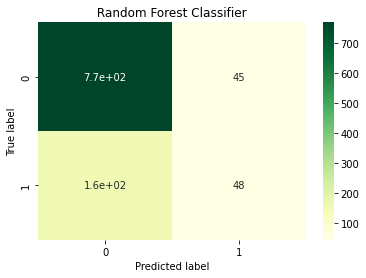

the f1 score for Random Forest Classifier is : 0.6013793103448275
the precision score is : 0.6723039983296795
the recall score is : 0.5882667522327397


0.8

In [70]:
from sklearn.metrics import accuracy_score, make_scorer,f1_score, precision_score, recall_score, confusion_matrix
rm= RandomForestClassifier(random_state=20)
rm.fit(X_train, y_train.ravel())
y_pred_train=rm.predict(X_train)
y_pred= rm.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")
plt.title(' Random Forest Classifier ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("the f1 score for Random Forest Classifier is :",(f1_score(y_test, y_pred, average="macro")))
print("the precision score is :",(precision_score(y_test, y_pred, average="macro")))
print("the recall score is :",(recall_score(y_test, y_pred, average="macro")))  
rm.score(X_test, y_test)

In [69]:
from sklearn import metrics
print("Accuracy  train  = {0:.3f}".format(metrics.accuracy_score(y_train, y_pred_train)))
print("Accuracy  test = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy  train  = 0.999
Accuracy  test = 0.800


we can see that the model achieved an estimated classification accuracy of about 80 percent the test data and 99.99 percent for train data 

Hyperparameter optimization using RandomizedSearchCV

In [76]:
params={'n_estimators': [ 100, 150, 250, 450, 500,700,800,1000],
        'min_samples_split':[2,3,4,5],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,17,20,25],
 'random_state':[10,15,20,30,50,75,100]
 
 
    
}
from sklearn.model_selection import RandomizedSearchCV
import xgboost


random_search=RandomizedSearchCV(rm,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y.ravel())
random_search.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomForestClassifier(max_depth=4, random_state=10)

In [77]:
# random forest classifier with optimal hyperparameters found above 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier( max_depth =4 , random_state = 10 )
rfc.fit(X_train, y_train)
y_pred_train =  rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)
print("Train f1 score = ", train_f1)
print("Test f1 score = ", test_f1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train f1 score =  0.164
Test f1 score =  0.11206896551724138


In [78]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)
score=cross_val_score(rfc,X,y.ravel(),cv=kf)
score

array([0.83382353, 0.79705882, 0.81001473, 0.81296024, 0.80559647])